In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
male_data = pd.read_excel(r'男胎.xlsx')

In [3]:
male_data.head(10)

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Y染色体浓度,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,A001,31,160.0,72.0,2023-02-01 00:00:00,自然受孕,20230429,1,11w+6,...,0.025936,0.038061,0.377069,0.389803,0.399399,0.027484,NaN,1,0,是
1,2,A001,31,160.0,73.0,2023-02-01 00:00:00,自然受孕,20230531,2,15w+6,...,0.034887,0.059572,0.371542,0.384771,0.391706,0.019617,NaN,1,0,是
2,3,A001,31,160.0,73.0,2023-02-01 00:00:00,自然受孕,20230625,3,20w+1,...,0.066171,0.075995,0.377449,0.390582,0.399480,0.022312,NaN,1,0,是
3,4,A001,31,160.0,74.0,2023-02-01 00:00:00,自然受孕,20230716,4,22w+6,...,0.061192,0.052305,0.375613,0.389251,0.397212,0.023280,NaN,1,0,是
4,5,A002,32,149.0,74.0,2023-11-09 00:00:00,自然受孕,20240219,1,13w+6,...,0.059230,0.059708,0.380260,0.393618,0.404868,0.024212,NaN,2,1,否
5,6,A002,32,149.0,76.0,2023-11-09 00:00:00,自然受孕,20240310,2,16w+5,...,0.042401,0.040477,0.377387,0.390282,0.399467,0.026017,NaN,2,1,否
6,7,A002,32,149.0,75.0,2023-11-09 00:00:00,自然受孕,20240401,3,19w+5,...,0.047825,0.012478,0.375591,0.387779,0.395050,0.020620,NaN,2,1,否
7,8,A002,32,149.0,76.0,2023-11-09 00:00:00,自然受孕,20240429,4,23w+4,...,0.042675,0.030227,0.377183,0.390219,0.397856,0.027578,T18,2,1,否
8,9,A002,32,149.0,76.0,2023-11-09 00:00:00,自然受孕,20240503,4,23w+4,...,0.047362,0.025030,0.386809,0.398356,0.409255,0.026950,T13T18,2,1,否
9,10,A003,35,160.0,78.7,2023-02-20 00:00:00,自然受孕,20230522,1,13w,...,0.054712,0.039109,0.381178,0.394178,0.403653,0.021138,T21,≥3,1,是


In [4]:
print(male_data.info())  # 检查数据结构、数据类型和缺失值
print(male_data.head())  # 查看数据的前几行

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   序号            1082 non-null   int64  
 1   孕妇代码          1082 non-null   object 
 2   年龄            1082 non-null   int64  
 3   身高            1082 non-null   float64
 4   体重            1082 non-null   float64
 5   末次月经          1070 non-null   object 
 6   IVF妊娠         1082 non-null   object 
 7   检测日期          1082 non-null   object 
 8   检测抽血次数        1082 non-null   int64  
 9   检测孕周          1082 non-null   object 
 10  孕妇BMI         1082 non-null   float64
 11  原始读段数         1082 non-null   int64  
 12  在参考基因组上比对的比例  1082 non-null   float64
 13  重复读段的比例       1082 non-null   float64
 14  唯一比对的读段数      1082 non-null   int64  
 15  GC含量          1082 non-null   float64
 16  13号染色体的Z值     1082 non-null   float64
 17  18号染色体的Z值     1082 non-null   float64
 18  21号染色体的Z值     1082 non-null 

In [5]:
male_data.describe ()

,序号,年龄,身高,体重,检测抽血次数,孕妇BMI,原始读段数,在参考基因组上比对的比例,重复读段的比例,唯一比对的读段数,...,21号染色体的Z值,X染色体的Z值,Y染色体的Z值,Y染色体浓度,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,生产次数
count,1082.0000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1.082000e+03,1082.000000,1082.000000,1.082000e+03,...,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000
mean,541.5000,28.939926,161.063771,83.894834,2.487985,32.288791,4.692190e+06,0.797472,0.030474,3.546561e+06,...,-0.115709,0.325178,0.156143,0.077187,0.057025,0.378693,0.391479,0.400851,0.023043,0.379852
std,312.4908,3.656264,5.232176,9.917950,1.127548,2.972432,9.487380e+05,0.014951,0.002747,7.128179e+05,...,1.098919,1.292893,1.307729,0.033518,0.041465,0.003164,0.003020,0.003810,0.003403,0.637178
min,1.0000,21.000000,144.000000,53.000000,1.000000,20.703125,1.342544e+06,0.598638,0.021150,9.806060e+05,...,-3.289376,-3.919148,-4.005487,0.010004,-0.076508,0.366487,0.378465,0.385214,0.011983,0.000000
25%,271.2500,27.000000,158.000000,77.010000,1.000000,30.208806,4.061409e+06,0.790337,0.028664,3.080606e+06,...,-0.855335,-0.479786,-0.666978,0.051381,0.029687,0.376749,0.389702,0.398579,0.020757,0.000000
50%,541.5000,29.000000,161.000000,82.915000,2.000000,31.811598,4.638084e+06,0.800459,0.030246,3.504966e+06,...,-0.139506,0.235179,0.023568,0.075066,0.055099,0.378502,0.391264,0.400683,0.022832,0.000000
75%,811.7500,31.000000,165.000000,89.087500,3.000000,33.926237,5.241410e+06,0.806439,0.032049,3.935570e+06,...,0.631616,1.098768,0.858907,0.098937,0.080623,0.380398,0.393160,0.403102,0.024978,1.000000
max,1082.0000,43.000000,175.000000,140.000000,5.000000,46.875000,9.895358e+06,0.846620,0.046519,7.342907e+06,...,3.137183,7.867670,7.000856,0.234218,0.223933,0.402935,0.412193,0.425052,0.037835,3.000000


In [6]:
male_data.columns

Index(['序号', '孕妇代码', '年龄', '身高', '体重', '末次月经', 'IVF妊娠', '检测日期', '检测抽血次数',
       '检测孕周', '孕妇BMI', '原始读段数', '在参考基因组上比对的比例', '重复读段的比例', '唯一比对的读段数  ',
       'GC含量', '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 'X染色体的Z值', 'Y染色体的Z值',
       'Y染色体浓度', 'X染色体浓度', '13号染色体的GC含量', '18号染色体的GC含量', '21号染色体的GC含量',
       '被过滤掉读段数的比例', '染色体的非整倍体', '怀孕次数', '生产次数', '胎儿是否健康'],
      dtype='object')

In [7]:
male_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1077    False
1078    False
1079    False
1080    False
1081    False
Length: 1082, dtype: bool

In [8]:
male_data[male_data.duplicated()]

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Y染色体浓度,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康


In [9]:
male_data.describe().T

,count,mean,std,min,25%,50%,75%,max
序号,1082.0,5.415000e+02,312.490800,1.000000e+00,2.712500e+02,5.415000e+02,8.117500e+02,1.082000e+03
年龄,1082.0,2.893993e+01,3.656264,2.100000e+01,2.700000e+01,2.900000e+01,3.100000e+01,4.300000e+01
身高,1082.0,1.610638e+02,5.232176,1.440000e+02,1.580000e+02,1.610000e+02,1.650000e+02,1.750000e+02
体重,1082.0,8.389483e+01,9.917950,5.300000e+01,7.701000e+01,8.291500e+01,8.908750e+01,1.400000e+02
检测抽血次数,1082.0,2.487985e+00,1.127548,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
孕妇BMI,1082.0,3.228879e+01,2.972432,2.070312e+01,3.020881e+01,3.181160e+01,3.392624e+01,4.687500e+01
原始读段数,1082.0,4.692190e+06,948737.953207,1.342544e+06,4.061409e+06,4.638084e+06,5.241410e+06,9.895358e+06
在参考基因组上比对的比例,1082.0,7.974721e-01,0.014951,5.986381e-01,7.903365e-01,8.004592e-01,8.064387e-01,8.466204e-01
重复读段的比例,1082.0,3.047394e-02,0.002747,2.115006e-02,2.866429e-02,3.024586e-02,3.204936e-02,4.651945e-02
唯一比对的读段数,1082.0,3.546561e+06,712817.868418,9.806060e+05,3.080606e+06,3.504966e+06,3.935570e+06,7.342907e+06


In [10]:
male_data.isnull()

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Y染色体浓度,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1078,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1079,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1080,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [11]:
male_data.isnull().sum()

序号                0
孕妇代码              0
年龄                0
身高                0
体重                0
末次月经             12
IVF妊娠             0
检测日期              0
检测抽血次数            0
检测孕周              0
孕妇BMI             0
原始读段数             0
在参考基因组上比对的比例      0
重复读段的比例           0
唯一比对的读段数          0
GC含量              0
13号染色体的Z值         0
18号染色体的Z值         0
21号染色体的Z值         0
X染色体的Z值           0
Y染色体的Z值           0
Y染色体浓度            0
X染色体浓度            0
13号染色体的GC含量       0
18号染色体的GC含量       0
21号染色体的GC含量       0
被过滤掉读段数的比例        0
染色体的非整倍体        956
怀孕次数              0
生产次数              0
胎儿是否健康            0
dtype: int64

In [12]:
male_data['末次月经'] = pd.to_datetime(male_data['末次月经'], errors='coerce')

# 方法 1：使用最频繁的日期填补
most_frequent_date = male_data['末次月经'].mode()[0]  # 找到最常见的日期
male_data['末次月经'] = male_data['末次月经'].fillna(most_frequent_date)
print(male_data['末次月经'].isnull().sum())

0


In [13]:
male_data

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Y染色体浓度,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,A001,31,160.0,72.00,2023-02-01,自然受孕,20230429,1,11w+6,...,0.025936,0.038061,0.377069,0.389803,0.399399,0.027484,NaN,1,0,是
1,2,A001,31,160.0,73.00,2023-02-01,自然受孕,20230531,2,15w+6,...,0.034887,0.059572,0.371542,0.384771,0.391706,0.019617,NaN,1,0,是
2,3,A001,31,160.0,73.00,2023-02-01,自然受孕,20230625,3,20w+1,...,0.066171,0.075995,0.377449,0.390582,0.399480,0.022312,NaN,1,0,是
3,4,A001,31,160.0,74.00,2023-02-01,自然受孕,20230716,4,22w+6,...,0.061192,0.052305,0.375613,0.389251,0.397212,0.023280,NaN,1,0,是
4,5,A002,32,149.0,74.00,2023-11-09,自然受孕,20240219,1,13w+6,...,0.059230,0.059708,0.380260,0.393618,0.404868,0.024212,NaN,2,1,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,1078,A266,30,159.0,83.35,2022-12-29,自然受孕,2023-05-02 00:00:00,4,17w+5,...,0.099052,0.056686,0.376861,0.389914,0.397090,0.017951,T18,1,0,是
1078,1079,A267,28,155.0,73.76,2023-02-25,自然受孕,2023-05-17 00:00:00,1,11w+4,...,0.098706,0.023663,0.377597,0.387901,0.404293,0.022549,T21,1,0,是
1079,1080,A267,28,155.0,74.06,2023-02-25,自然受孕,2023-05-24 00:00:00,2,12w+4,...,0.102088,0.080264,0.379041,0.391748,0.400433,0.021330,NaN,1,0,是
1080,1081,A267,28,155.0,74.74,2023-02-25,自然受孕,2023-05-31 00:00:00,3,13w+4,...,0.109855,0.074050,0.379107,0.388544,0.401030,0.022013,NaN,1,0,是


In [14]:
male_data['Y染色体浓度'] = pd.to_numeric(male_data['Y染色体浓度'], errors='coerce')
male_data['孕妇BMI'] = pd.to_numeric(male_data['孕妇BMI'], errors='coerce')

In [15]:
# 使用 IQR (四分位距) 方法来检测和处理异常值
Q1 = male_data['Y染色体浓度'].quantile(0.25)
Q3 = male_data['Y染色体浓度'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 过滤异常值
male_data = male_data[(male_data['Y染色体浓度'] >= lower_bound) & (male_data['Y染色体浓度'] <= upper_bound)]


In [16]:
male_data

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Y染色体浓度,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,A001,31,160.0,72.00,2023-02-01,自然受孕,20230429,1,11w+6,...,0.025936,0.038061,0.377069,0.389803,0.399399,0.027484,NaN,1,0,是
1,2,A001,31,160.0,73.00,2023-02-01,自然受孕,20230531,2,15w+6,...,0.034887,0.059572,0.371542,0.384771,0.391706,0.019617,NaN,1,0,是
2,3,A001,31,160.0,73.00,2023-02-01,自然受孕,20230625,3,20w+1,...,0.066171,0.075995,0.377449,0.390582,0.399480,0.022312,NaN,1,0,是
3,4,A001,31,160.0,74.00,2023-02-01,自然受孕,20230716,4,22w+6,...,0.061192,0.052305,0.375613,0.389251,0.397212,0.023280,NaN,1,0,是
4,5,A002,32,149.0,74.00,2023-11-09,自然受孕,20240219,1,13w+6,...,0.059230,0.059708,0.380260,0.393618,0.404868,0.024212,NaN,2,1,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,1078,A266,30,159.0,83.35,2022-12-29,自然受孕,2023-05-02 00:00:00,4,17w+5,...,0.099052,0.056686,0.376861,0.389914,0.397090,0.017951,T18,1,0,是
1078,1079,A267,28,155.0,73.76,2023-02-25,自然受孕,2023-05-17 00:00:00,1,11w+4,...,0.098706,0.023663,0.377597,0.387901,0.404293,0.022549,T21,1,0,是
1079,1080,A267,28,155.0,74.06,2023-02-25,自然受孕,2023-05-24 00:00:00,2,12w+4,...,0.102088,0.080264,0.379041,0.391748,0.400433,0.021330,NaN,1,0,是
1080,1081,A267,28,155.0,74.74,2023-02-25,自然受孕,2023-05-31 00:00:00,3,13w+4,...,0.109855,0.074050,0.379107,0.388544,0.401030,0.022013,NaN,1,0,是


In [17]:
# 使用 IQR (四分位距) 方法来检测和处理异常值
Q1 = male_data['孕妇BMI'].quantile(0.25)
Q3 = male_data['孕妇BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 过滤异常值
male_data = male_data[(male_data['孕妇BMI'] >= lower_bound) & (male_data['孕妇BMI'] <= upper_bound)]

In [18]:
male_data

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Y染色体浓度,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,A001,31,160.0,72.00,2023-02-01,自然受孕,20230429,1,11w+6,...,0.025936,0.038061,0.377069,0.389803,0.399399,0.027484,NaN,1,0,是
1,2,A001,31,160.0,73.00,2023-02-01,自然受孕,20230531,2,15w+6,...,0.034887,0.059572,0.371542,0.384771,0.391706,0.019617,NaN,1,0,是
2,3,A001,31,160.0,73.00,2023-02-01,自然受孕,20230625,3,20w+1,...,0.066171,0.075995,0.377449,0.390582,0.399480,0.022312,NaN,1,0,是
3,4,A001,31,160.0,74.00,2023-02-01,自然受孕,20230716,4,22w+6,...,0.061192,0.052305,0.375613,0.389251,0.397212,0.023280,NaN,1,0,是
4,5,A002,32,149.0,74.00,2023-11-09,自然受孕,20240219,1,13w+6,...,0.059230,0.059708,0.380260,0.393618,0.404868,0.024212,NaN,2,1,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,1078,A266,30,159.0,83.35,2022-12-29,自然受孕,2023-05-02 00:00:00,4,17w+5,...,0.099052,0.056686,0.376861,0.389914,0.397090,0.017951,T18,1,0,是
1078,1079,A267,28,155.0,73.76,2023-02-25,自然受孕,2023-05-17 00:00:00,1,11w+4,...,0.098706,0.023663,0.377597,0.387901,0.404293,0.022549,T21,1,0,是
1079,1080,A267,28,155.0,74.06,2023-02-25,自然受孕,2023-05-24 00:00:00,2,12w+4,...,0.102088,0.080264,0.379041,0.391748,0.400433,0.021330,NaN,1,0,是
1080,1081,A267,28,155.0,74.74,2023-02-25,自然受孕,2023-05-31 00:00:00,3,13w+4,...,0.109855,0.074050,0.379107,0.388544,0.401030,0.022013,NaN,1,0,是


In [19]:
import re

def extract_week(x):

    if '+' in x:
   
        week_number = int(re.findall(r'\d+', x)[0])  # 提取 'w' 前面的数字
        extra_days = int(re.findall(r'\d+', x.split('+')[1])[0])  # 提取 '+' 后面的数字
        return week_number + extra_days / 7
    else:
 
        return int(re.findall(r'\d+', x)[0])


male_data['检测孕周'] = male_data['检测孕周'].apply(extract_week)



C:\Users\23163\AppData\Local\Temp\ipykernel_3044\188083529.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['检测孕周'] = male_data['检测孕周'].apply(extract_week)


In [20]:
male_data

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Y染色体浓度,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,A001,31,160.0,72.00,2023-02-01,自然受孕,20230429,1,11.857143,...,0.025936,0.038061,0.377069,0.389803,0.399399,0.027484,NaN,1,0,是
1,2,A001,31,160.0,73.00,2023-02-01,自然受孕,20230531,2,15.857143,...,0.034887,0.059572,0.371542,0.384771,0.391706,0.019617,NaN,1,0,是
2,3,A001,31,160.0,73.00,2023-02-01,自然受孕,20230625,3,20.142857,...,0.066171,0.075995,0.377449,0.390582,0.399480,0.022312,NaN,1,0,是
3,4,A001,31,160.0,74.00,2023-02-01,自然受孕,20230716,4,22.857143,...,0.061192,0.052305,0.375613,0.389251,0.397212,0.023280,NaN,1,0,是
4,5,A002,32,149.0,74.00,2023-11-09,自然受孕,20240219,1,13.857143,...,0.059230,0.059708,0.380260,0.393618,0.404868,0.024212,NaN,2,1,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,1078,A266,30,159.0,83.35,2022-12-29,自然受孕,2023-05-02 00:00:00,4,17.714286,...,0.099052,0.056686,0.376861,0.389914,0.397090,0.017951,T18,1,0,是
1078,1079,A267,28,155.0,73.76,2023-02-25,自然受孕,2023-05-17 00:00:00,1,11.571429,...,0.098706,0.023663,0.377597,0.387901,0.404293,0.022549,T21,1,0,是
1079,1080,A267,28,155.0,74.06,2023-02-25,自然受孕,2023-05-24 00:00:00,2,12.571429,...,0.102088,0.080264,0.379041,0.391748,0.400433,0.021330,NaN,1,0,是
1080,1081,A267,28,155.0,74.74,2023-02-25,自然受孕,2023-05-31 00:00:00,3,13.571429,...,0.109855,0.074050,0.379107,0.388544,0.401030,0.022013,NaN,1,0,是


In [21]:
male_data.describe().T

,count,mean,min,25%,50%,75%,max,std
序号,1047.0,545.980898,1.0,270.5,552.0,820.5,1082.0,315.503839
年龄,1047.0,28.917861,21.0,26.0,29.0,31.0,43.0,3.667716
身高,1047.0,161.016237,144.0,158.0,161.0,165.0,175.0,5.228363
体重,1047.0,83.432579,61.5,77.02,82.55,88.4,113.5,8.778775
末次月经,1047,2023-03-20 01:37:39.025788160,2022-10-08 00:00:00,2023-01-05 12:00:00,2023-02-10 00:00:00,2023-05-30 00:00:00,2023-12-04 00:00:00,NaN
检测抽血次数,1047.0,2.475645,1.0,1.0,2.0,3.0,5.0,1.125546
检测孕周,1047.0,16.747851,11.0,13.285714,16.0,20.0,29.0,4.043217
孕妇BMI,1047.0,32.137419,26.619343,30.183039,31.761566,33.789062,39.352509,2.526855
原始读段数,1047.0,4693072.964661,1342544.0,4064391.0,4643185.0,5258706.0,9895358.0,949803.059846
在参考基因组上比对的比例,1047.0,0.797403,0.598638,0.790282,0.800346,0.806388,0.84662,0.015031


In [25]:
female_data = pd.read_excel(r'女胎.xlsx')

In [26]:
female_data

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Unnamed: 21,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231119,1,13w+5,...,NaN,-0.016976,0.379614,0.392832,0.402970,0.024708,NaN,1,0,是
1,2,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231208,2,17w+1,...,NaN,-0.024409,0.377950,0.391176,0.399509,0.025608,NaN,1,0,是
2,3,B001,32,162.0,85.0,2023-08-06 00:00:00,自然受孕,20240101,3,19w+6,...,NaN,-0.016357,0.385021,0.397515,0.408611,0.024452,NaN,1,0,是
3,4,B001,32,162.0,86.0,2023-08-06 00:00:00,自然受孕,20240123,4,23w,...,NaN,-0.021307,0.376070,0.389126,0.397539,0.022412,NaN,1,0,是
4,5,B002,33,165.0,96.0,2023-02-15 00:00:00,自然受孕,20230519,1,12w+5,...,NaN,-0.000886,0.378697,0.391196,0.401632,0.022843,NaN,1,0,是
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,601,B146,34,164.0,90.0,2022-12-31 00:00:00,自然受孕,20230615,4,23w+1,...,NaN,-0.014243,0.381691,0.393509,0.402032,0.019539,T18,≥3,1,是
601,602,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230423,1,15w,...,NaN,-0.000855,0.382151,0.395193,0.406132,0.022342,NaN,≥3,1,是
602,603,B147,32,166.0,84.0,2023-01-08 00:00:00,自然受孕,20230513,2,15w+4,...,NaN,-0.006456,0.378540,0.391420,0.400972,0.027777,NaN,≥3,1,是
603,604,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230610,3,19w+4,...,NaN,-0.013719,0.379481,0.391826,0.401168,0.022127,NaN,≥3,1,是


In [27]:
female_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
600    False
601    False
602    False
603    False
604    False
Length: 605, dtype: bool

In [28]:
female_data[female_data.duplicated()]

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Unnamed: 21,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康


In [29]:
female_data.isnull().sum()

序号                0
孕妇代码              0
年龄                0
身高                0
体重                0
末次月经              0
IVF妊娠             0
检测日期              0
检测抽血次数            0
检测孕周              0
孕妇BMI             1
原始读段数             0
在参考基因组上比对的比例      0
重复读段的比例           0
唯一比对的读段数          0
GC含量              0
13号染色体的Z值         0
18号染色体的Z值         0
21号染色体的Z值         0
X染色体的Z值           0
Unnamed: 20     605
Unnamed: 21     605
X染色体浓度            0
13号染色体的GC含量       0
18号染色体的GC含量       0
21号染色体的GC含量       0
被过滤掉读段数的比例        0
染色体的非整倍体        538
怀孕次数              0
生产次数              0
胎儿是否健康            0
dtype: int64

In [31]:
female_data['孕妇BMI'] = pd.to_numeric(female_data['孕妇BMI'], errors='coerce')

# 方法 1：使用最频繁的日期填补
mean_value = female_data['孕妇BMI'].mean()  # 找到最常见的日期
female_data['孕妇BMI'] = female_data['孕妇BMI'].fillna(mean_value)
print(female_data['孕妇BMI'].isnull().sum())

0


In [32]:
female_data

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Unnamed: 21,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231119,1,13w+5,...,NaN,-0.016976,0.379614,0.392832,0.402970,0.024708,NaN,1,0,是
1,2,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231208,2,17w+1,...,NaN,-0.024409,0.377950,0.391176,0.399509,0.025608,NaN,1,0,是
2,3,B001,32,162.0,85.0,2023-08-06 00:00:00,自然受孕,20240101,3,19w+6,...,NaN,-0.016357,0.385021,0.397515,0.408611,0.024452,NaN,1,0,是
3,4,B001,32,162.0,86.0,2023-08-06 00:00:00,自然受孕,20240123,4,23w,...,NaN,-0.021307,0.376070,0.389126,0.397539,0.022412,NaN,1,0,是
4,5,B002,33,165.0,96.0,2023-02-15 00:00:00,自然受孕,20230519,1,12w+5,...,NaN,-0.000886,0.378697,0.391196,0.401632,0.022843,NaN,1,0,是
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,601,B146,34,164.0,90.0,2022-12-31 00:00:00,自然受孕,20230615,4,23w+1,...,NaN,-0.014243,0.381691,0.393509,0.402032,0.019539,T18,≥3,1,是
601,602,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230423,1,15w,...,NaN,-0.000855,0.382151,0.395193,0.406132,0.022342,NaN,≥3,1,是
602,603,B147,32,166.0,84.0,2023-01-08 00:00:00,自然受孕,20230513,2,15w+4,...,NaN,-0.006456,0.378540,0.391420,0.400972,0.027777,NaN,≥3,1,是
603,604,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230610,3,19w+4,...,NaN,-0.013719,0.379481,0.391826,0.401168,0.022127,NaN,≥3,1,是


In [33]:
female_data['孕妇BMI'] = pd.to_numeric(female_data['孕妇BMI'], errors='coerce')

In [34]:
Q1 = female_data['孕妇BMI'].quantile(0.25)
Q3 = female_data['孕妇BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 过滤异常值
female_data = female_data[(female_data['孕妇BMI'] >= lower_bound) & (female_data['孕妇BMI'] <= upper_bound)]

In [35]:
female_data

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Unnamed: 21,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231119,1,13w+5,...,NaN,-0.016976,0.379614,0.392832,0.402970,0.024708,NaN,1,0,是
1,2,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231208,2,17w+1,...,NaN,-0.024409,0.377950,0.391176,0.399509,0.025608,NaN,1,0,是
2,3,B001,32,162.0,85.0,2023-08-06 00:00:00,自然受孕,20240101,3,19w+6,...,NaN,-0.016357,0.385021,0.397515,0.408611,0.024452,NaN,1,0,是
3,4,B001,32,162.0,86.0,2023-08-06 00:00:00,自然受孕,20240123,4,23w,...,NaN,-0.021307,0.376070,0.389126,0.397539,0.022412,NaN,1,0,是
4,5,B002,33,165.0,96.0,2023-02-15 00:00:00,自然受孕,20230519,1,12w+5,...,NaN,-0.000886,0.378697,0.391196,0.401632,0.022843,NaN,1,0,是
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,601,B146,34,164.0,90.0,2022-12-31 00:00:00,自然受孕,20230615,4,23w+1,...,NaN,-0.014243,0.381691,0.393509,0.402032,0.019539,T18,≥3,1,是
601,602,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230423,1,15w,...,NaN,-0.000855,0.382151,0.395193,0.406132,0.022342,NaN,≥3,1,是
602,603,B147,32,166.0,84.0,2023-01-08 00:00:00,自然受孕,20230513,2,15w+4,...,NaN,-0.006456,0.378540,0.391420,0.400972,0.027777,NaN,≥3,1,是
603,604,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230610,3,19w+4,...,NaN,-0.013719,0.379481,0.391826,0.401168,0.022127,NaN,≥3,1,是


In [36]:
import re

def extract_week(x):

    if '+' in x:
   
        week_number = int(re.findall(r'\d+', x)[0])  # 提取 'w' 前面的数字
        extra_days = int(re.findall(r'\d+', x.split('+')[1])[0])  # 提取 '+' 后面的数字
        return week_number + extra_days / 7
    else:
 
        return int(re.findall(r'\d+', x)[0])


female_data['检测孕周'] = female_data['检测孕周'].apply(extract_week)



C:\Users\23163\AppData\Local\Temp\ipykernel_37976\197803377.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['检测孕周'] = female_data['检测孕周'].apply(extract_week)


In [37]:
female_data

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Unnamed: 21,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231119,1,13.714286,...,NaN,-0.016976,0.379614,0.392832,0.402970,0.024708,NaN,1,0,是
1,2,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231208,2,17.142857,...,NaN,-0.024409,0.377950,0.391176,0.399509,0.025608,NaN,1,0,是
2,3,B001,32,162.0,85.0,2023-08-06 00:00:00,自然受孕,20240101,3,19.857143,...,NaN,-0.016357,0.385021,0.397515,0.408611,0.024452,NaN,1,0,是
3,4,B001,32,162.0,86.0,2023-08-06 00:00:00,自然受孕,20240123,4,23.000000,...,NaN,-0.021307,0.376070,0.389126,0.397539,0.022412,NaN,1,0,是
4,5,B002,33,165.0,96.0,2023-02-15 00:00:00,自然受孕,20230519,1,12.714286,...,NaN,-0.000886,0.378697,0.391196,0.401632,0.022843,NaN,1,0,是
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,601,B146,34,164.0,90.0,2022-12-31 00:00:00,自然受孕,20230615,4,23.142857,...,NaN,-0.014243,0.381691,0.393509,0.402032,0.019539,T18,≥3,1,是
601,602,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230423,1,15.000000,...,NaN,-0.000855,0.382151,0.395193,0.406132,0.022342,NaN,≥3,1,是
602,603,B147,32,166.0,84.0,2023-01-08 00:00:00,自然受孕,20230513,2,15.571429,...,NaN,-0.006456,0.378540,0.391420,0.400972,0.027777,NaN,≥3,1,是
603,604,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230610,3,19.571429,...,NaN,-0.013719,0.379481,0.391826,0.401168,0.022127,NaN,≥3,1,是


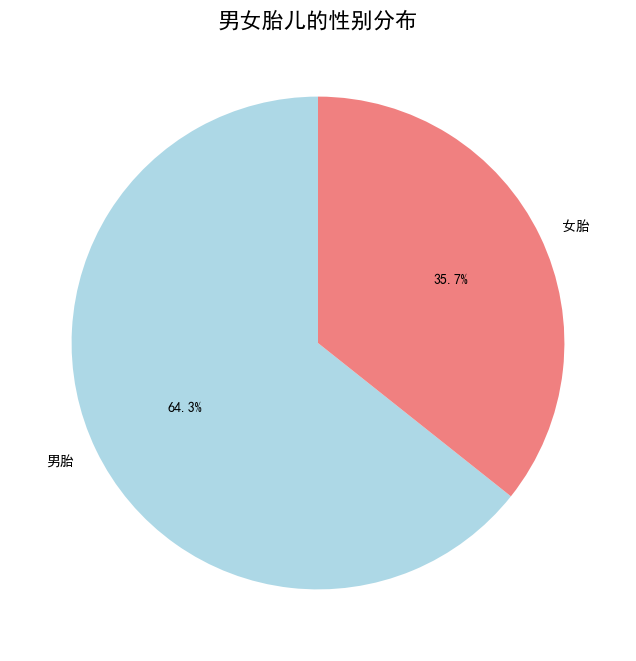

In [1]:
import matplotlib.pyplot as plt

# 男胎和女胎的数量
male_count = 1047
female_count = 581

# 数据和标签
labels = ['男胎', '女胎']
sizes = [male_count, female_count]
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 绘制饼状图
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# 设置标题
plt.title('男女胎儿的性别分布', fontsize=16)

# 显示图像
plt.show()

In [39]:
# 合并两张表（按行）
combined_data = pd.concat([male_data, female_data], ignore_index=True)

# 查看合并后的数据
print(combined_data.head())

   序号  孕妇代码  年龄     身高    体重                 末次月经 IVF妊娠      检测日期  检测抽血次数  \
0   1  A001  31  160.0  72.0  2023-02-01 00:00:00  自然受孕  20230429       1   
1   2  A001  31  160.0  73.0  2023-02-01 00:00:00  自然受孕  20230531       2   
2   3  A001  31  160.0  73.0  2023-02-01 00:00:00  自然受孕  20230625       3   
3   4  A001  31  160.0  74.0  2023-02-01 00:00:00  自然受孕  20230716       4   
4   5  A002  32  149.0  74.0  2023-11-09 00:00:00  自然受孕  20240219       1   

        检测孕周  ...  18号染色体的GC含量  21号染色体的GC含量  被过滤掉读段数的比例  染色体的非整倍体  怀孕次数  生产次数  \
0  11.857143  ...     0.389803     0.399399    0.027484       NaN     1     0   
1  15.857143  ...     0.384771     0.391706    0.019617       NaN     1     0   
2  20.142857  ...     0.390582     0.399480    0.022312       NaN     1     0   
3  22.857143  ...     0.389251     0.397212    0.023280       NaN     1     0   
4  13.857143  ...     0.393618     0.404868    0.024212       NaN     2     1   

   胎儿是否健康  唯一比对的读段数  Unnamed: 20  Unnamed: 21  
0 

In [40]:
combined_data

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康,唯一比对的读段数,Unnamed: 20,Unnamed: 21
0,1,A001,31,160.0,72.0,2023-02-01 00:00:00,自然受孕,20230429,1,11.857143,...,0.389803,0.399399,0.027484,NaN,1,0,是,NaN,NaN,NaN
1,2,A001,31,160.0,73.0,2023-02-01 00:00:00,自然受孕,20230531,2,15.857143,...,0.384771,0.391706,0.019617,NaN,1,0,是,NaN,NaN,NaN
2,3,A001,31,160.0,73.0,2023-02-01 00:00:00,自然受孕,20230625,3,20.142857,...,0.390582,0.399480,0.022312,NaN,1,0,是,NaN,NaN,NaN
3,4,A001,31,160.0,74.0,2023-02-01 00:00:00,自然受孕,20230716,4,22.857143,...,0.389251,0.397212,0.023280,NaN,1,0,是,NaN,NaN,NaN
4,5,A002,32,149.0,74.0,2023-11-09 00:00:00,自然受孕,20240219,1,13.857143,...,0.393618,0.404868,0.024212,NaN,2,1,否,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,601,B146,34,164.0,90.0,2022-12-31 00:00:00,自然受孕,20230615,4,23.142857,...,0.393509,0.402032,0.019539,T18,≥3,1,是,2996706.0,NaN,NaN
1624,602,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230423,1,15.000000,...,0.395193,0.406132,0.022342,NaN,≥3,1,是,2693582.0,NaN,NaN
1625,603,B147,32,166.0,84.0,2023-01-08 00:00:00,自然受孕,20230513,2,15.571429,...,0.391420,0.400972,0.027777,NaN,≥3,1,是,3838256.0,NaN,NaN
1626,604,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230610,3,19.571429,...,0.391826,0.401168,0.022127,NaN,≥3,1,是,3831943.0,NaN,NaN


In [49]:
male_data.to_excel('male_cleaned_data.xlsx', index=False)
female_data.to_excel('female_cleaned_data.xlsx', index=False)
combined_data.to_excel('combined_data.xlsx', index=False)

In [47]:
combined_data = pd.concat([male_data, female_data], ignore_index=True)


In [48]:
combined_data

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康,唯一比对的读段数,Unnamed: 20,Unnamed: 21
0,1,A001,31,160.0,72.0,2023-02-01 00:00:00,自然受孕,20230429,1,11.857143,...,0.389803,0.399399,0.027484,NaN,1,0,是,NaN,NaN,NaN
1,2,A001,31,160.0,73.0,2023-02-01 00:00:00,自然受孕,20230531,2,15.857143,...,0.384771,0.391706,0.019617,NaN,1,0,是,NaN,NaN,NaN
2,3,A001,31,160.0,73.0,2023-02-01 00:00:00,自然受孕,20230625,3,20.142857,...,0.390582,0.399480,0.022312,NaN,1,0,是,NaN,NaN,NaN
3,4,A001,31,160.0,74.0,2023-02-01 00:00:00,自然受孕,20230716,4,22.857143,...,0.389251,0.397212,0.023280,NaN,1,0,是,NaN,NaN,NaN
4,5,A002,32,149.0,74.0,2023-11-09 00:00:00,自然受孕,20240219,1,13.857143,...,0.393618,0.404868,0.024212,NaN,2,1,否,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,601,B146,34,164.0,90.0,2022-12-31 00:00:00,自然受孕,20230615,4,23.142857,...,0.393509,0.402032,0.019539,T18,≥3,1,是,2996706.0,NaN,NaN
1624,602,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230423,1,15.000000,...,0.395193,0.406132,0.022342,NaN,≥3,1,是,2693582.0,NaN,NaN
1625,603,B147,32,166.0,84.0,2023-01-08 00:00:00,自然受孕,20230513,2,15.571429,...,0.391420,0.400972,0.027777,NaN,≥3,1,是,3838256.0,NaN,NaN
1626,604,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230610,3,19.571429,...,0.391826,0.401168,0.022127,NaN,≥3,1,是,3831943.0,NaN,NaN
